# Projeção de mapas

Sistema de referência de coordenadas (CRS) são importantes, porque as geometrias utilizadas em GeoDataFrame são simplesmente uma coleção de coordenadas em um espaço arbitrário. O CRS diz ao python como essas coordenadas estão relacionadas com o espaço no planeta terra. Uma projeção de mapa é uma transformação sistematica de latitudes e longitudes em uma superficie plana, em que as unidades são comumente representadas em metros (em vez de graus). Esta transformação são usadas para representar a terra tridimensional em um mapa plano e bidimensional.

Como o CRS em diferentes conjuntos de dados espaciais diferem com bastante frequência (isto é, pode-se ter coordenadas definidas em graus decimais enquanto em outro conjunto de dados está em metros), é um procedimento comum redefinir (ou reprojetar) o CRS para ser idêntico em ambos os datasets. É importante que as camadas possuam o mesmo sistema de referência de coordenadas, pois permite analisar as relações espaciais entre elas, como conduzir uma consulta de um Point em um Polygon.

Escolher uma projeção apropriada para o seu mapa nem sempre é  uma tarefa simples, porque depende do que você realmente quer representar com seu mapa e de qual é a escala espacial dos seus dados. De fato, não existe uma "projeção perfeita", já que cada uma tem alguns pontos fortes e fracos, e você deve escolher uma projeção que se ajuste melhor às suas necessidades. Na verdade, a projeção que você escolher pode até dizer algo sobre você:
    
![](images/Map-projections.png)
*Fonte: XKCD, See a full comic about ["What your favorite map projection tells about you"](https://xkcd.com/977/)*.

Para aqueles de vocês que querem um pouco mais de abordagem analítica para escolher a projeção, você pode obter uma boa visão geral em [georeference.org](http://www.georeference.org/doc/guide_to_selecting_map_projections.htm),  ou deste blog post introduzindo [os pontos fortes e fracos de algumas projeções comumente usadas](http://usersguidetotheuniverse.com/index.php/2011/03/03/whats-the-best-map-projection/).

## Sistema de referência de coordenadas (CRS) in Geopandas

Felizmente, para definir e alterar projeções no Geopandas é fácil. Neste tutorial vamos ver como recuperar as informações do sistema de referência dos dados e como alterá-lo. Também vamos reprojetar um arquivo de dados de
WGS84 (coordenadas de latitude longitude) em uma projeção de Lambert Azimuthal Equal Area que é a [projeção recomendada para o continente europeu](http://mapref.org/LinkedDocuments/MapProjectionsForEurope-EUR-20120.pdf) pela comissão europeia.

Para este tutorial, usaremos o Shapefile chamado `Europe_borders.shp`  que possui as fronteiras dos países na Europa, o mesmo  conjunto de dados utilizados no geopandas-basics.ipynb.

O Shapefile deve sempre conter informações sobre o sistema de referência de coordenadas que é armazenado no arquivo `.prj` (pelo menos se os dados tiverem sido produzidos apropriadamente). Ao ler os dados em `GeoDataFrame` com Geopandas esta informação é automaticamente armazenada no atributo `.crs` do GeoDataFrame.

- Vamos começar lendo os dados do arquivo `Europe_borders.shp` e verificando o` crs`:

In [3]:
# Import necessary packages
import geopandas as gpd

# Read the file
fp = "data/Europe_borders.shp"
data = gpd.read_file(fp)

# Check the coordinate reference system
data.crs

{'init': 'epsg:4326'}

Como podemos ver, o `crs` é um dicionário Python com uma chave` init` que tem um valor `epsg: 4326`. Essa é uma maneira muito típica de como o CRS é armazenado em GeoDataFrames. Há também outra maneira típica de representar o sistema de referência de coordenadas, ou seja, armazenar essa informação no formato [Proj4-string] (https://proj4.org/usage/quickstart.html).

O número da sigla EPSG (* "European Petroleum Survey Group" *) é um código que informa sobre o sistema de coordenadas do conjunto de dados. "[Conjunto de dados de parâmetros geodésicos EPSG] (http://www.epsg.org/) é uma coleção de definições de sistemas de referência de coordenadas e coordena transformações que podem ser globais, regionais, nacionais ou locais em aplicações". O código EPSG `4326` que temos aqui, pertence ao sistema de coordenadas WGS84 (isto é, as coordenadas estão em graus decimais: latitudes e longitudes).

Você pode encontrar muitas informações e listas de sistemas de referência de coordenadas disponíveis a partir de:

  - [www.spatialreference.org](http://spatialreference.org/)
  - [www.proj4.org](https://proj4.org/operations/projections/)
  - [www.mapref.org](http://mapref.org/CollectionofCRSinEurope.html)

- Vamos continuar verificando os valores na coluna `geometry` para verificar se o CRS de nosso GeoDataFrame parece correto:

In [2]:
data['geometry'].head()

0    POLYGON ((8.457777976989746 54.56236267089844,...
1    POLYGON ((8.71992015838623 47.69664382934571, ...
2    POLYGON ((6.733166694641113 53.5740852355957, ...
3    POLYGON ((6.858222007751465 53.59411239624024,...
4    POLYGON ((6.89894437789917 53.6256103515625, 6...
Name: geometry, dtype: object

Como podemos observar, os valores de coordenadas dos polígonos realmente se parecem com valores de latitude e longitude, então tudo parece estar em ordem.

A projeção do WGS84 não é realmente boa para representar as fronteiras européias, então vamos converter essas geometrias na projeção de Lambert Azimuthal Equal Area ([EPSG: 3035] (http://spatialreference.org/ref/epsg/etrs89-etrs-laea/) ), que é a projeção recomendada pela Comissão Europeia.

Mudar a projeção é simples de se fazer com Geopandas (http://geopandas.org/projections.html#re-projecting) utilizando a função `.to_crs ()`, que é uma função interna do GeoDataFrame. A função tem dois parâmetros alternativos: 1) `crs` e 2) `epgs`, que podem ser usados para fazer a transformação de coordenadas e reprojetar os dados no CRS que você deseja usar.

- Vamos reprojetar nossos dados para o `EPSG 3035` usando o parâmetro `epsg`:

In [4]:
# Let's make a copy of our data
orig = data.copy()

# Reproject the data
data = data.to_crs(epsg=3035)

# Check the new geometry values
print(data['geometry'].head())

0    POLYGON ((4221214.558088431 3496203.404338956,...
1    POLYGON ((4224860.478308966 2732279.319617757,...
2    POLYGON ((4104652.175545862 3390034.953002084,...
3    POLYGON ((4113025.664284974 3391895.755505159,...
4    POLYGON ((4115871.227627173 3395282.099288368,...
Name: geometry, dtype: object


Podemos ver que os valores de coordenadas nas geometrias foram alterados! Agora, mudamos com sucesso a projeção de nossa camada para uma nova.

Para realmente entender o que está acontecendo, é bom explorar nossos dados visualmente. Portanto, vamos comparar os conjuntos de dados fazendo criando mapas.


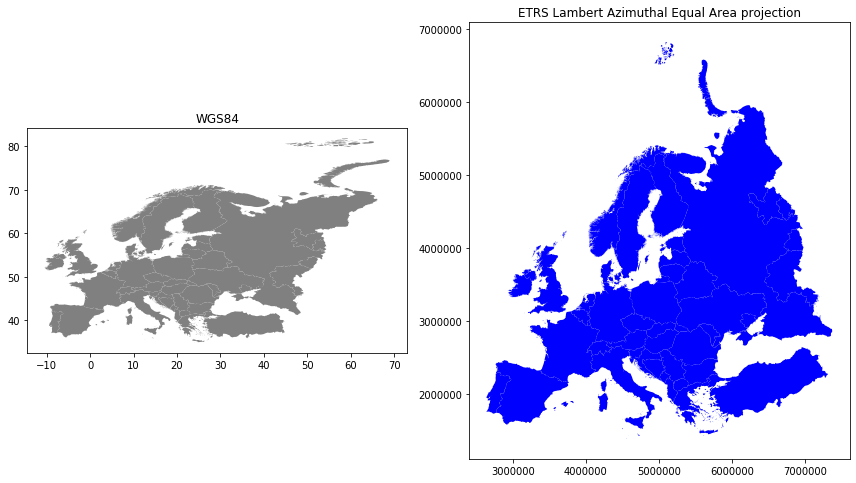

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
orig.plot(ax=ax1, facecolor='gray');

# Add title
ax1.set_title("WGS84");

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue');

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

Os mapas parecem bem diferentes, e o mapa reprojetado parece muito melhor na Europa, já que algumas áreas, especialmente no norte, são mais realistas e não tão esticadas quanto no WGS84.

- Vamos salvar nossa camada projetada em um Shapefile para podermos usá-lo mais tarde.

In [6]:
# Ouput filepath
outfp = "data/Europe_borders_epsg3035.shp"
    
# Save to disk
data.to_file(outfp)

## Calculando distâncias

Em seguida, conduziremos um exemplo prático com o arquivo `Europe_borders.shp`. Nosso objetivo é encontrar as distâncias euclidianas dos centróides (pontos médios) de todos os países europeus para a cidade de Helsinque, na Finlândia. Vamos calcular a distância entre Helsinki e outros países europeus usando uma projeção métrica ([Azimuthal Equidistant -projection] (https://proj4.org/operations/projections/aeqd.html)) que nos dá a distância em metros. Observe que essa projeção é um pouco menos utilizada.

- Vamos primeiro criar um GeoDataFrame que contenha um único ponto representando a localização de Helsinki, na Finlândia:

Para instalar o módulo pycrs, você pode utilizar o seguinte comando: conda install -c conda-forge pycrs 

In [10]:
# Import necessary modules
from shapely.geometry import Point
import pycrs

# Create the point representing Helsinki (in WGS84)
hki_lon = 24.9417
hki_lat = 60.1666

# Create GeoDataFrame
helsinki = gpd.GeoDataFrame([[Point(hki_lon, hki_lat)]], 
                            geometry='geometry', 
                            crs={'init': 'epsg:4326'}, 
                            columns=['geometry'])

# Print 
print(helsinki)

                  geometry
0  POINT (24.9417 60.1666)


Como podemos ver, é possível criar um GeoDataFrame diretamente utilizando penas uma linha de código. Observe que, aqui, especificamos o CRS diretamente passando o crs como um dicionário Python `{'init': 'epsg: 4326'}` que é uma maneira alternativa de definir o CRS. Nós também dissemos que a informação `geometry` é armazenada na coluna `geometry` que nós definimos com o parâmetro `columns = ['geometry'] `.

Em seguida, precisamos converter essa projeção do `GeoDataFrame` para "Azimuthal Equidistant" que possui propriedades bastantes úteis, porque todos os pontos nessa projeção estão em distâncias proporcionalmente corretas do ponto central (definidos com os parâmetros `lat_0` e `lon_0`), e todos os pontos no mapa estão na direção correta em relação ao ponto central.

Para realizar a transformação, vamos utilizar novamente uma string Proj4 que podemos obter usando outra biblioteca concentrada para sistemas de referência de coordenadas, chamada [pyproj] (https://github.com/jswhit/pyproj). Este pacote é útil quando se trata de projeções "especiais", como a demonstrada aqui.

 - Vamos criar nossa string Proj4 passando parâmetros específicos para o objeto `Proj ()` que são necessários para construir a [projeção equidistante azimutal] (https://proj4.org/operations/projections/aeqd.html):
    
    - `proj = 'aeqd'` refere-se ao *especificador de projeção* que determinamos ser Azimutal Equidistante ('aeqd ')
    - `ellps = 'WGS84'` refere-se ao [elipsóide de referência] (https://en.wikipedia.org/wiki/Reference_ellipsoid) que é uma superfície matematicamente modelada (baseada em medições) que se aproxima da verdadeira forma do mundo. O World Geodetic System (WGS) foi estabelecido em 1984, daí o nome.
    - `datum = 'WGS84'` refere-se ao [Geodetic datum] (https://en.wikipedia.org/wiki/Geodetic_datum) que é um sistema de coordenadas constituído com um conjunto de pontos de referência que podem ser usados ​​para localizar locais em Terra.
    - `lat_0` é a coordenada de latitude do ponto central na projeção
    - `lon_0` é a coordenada de longitude do ponto central na projeção

In [13]:
# Import pyproj
import pyproj

# Define the projection using the coordinates of our Helsinki point (hki_lat, hki_lon) as the center point
# The .srs here returns the Proj4-string presentation of the projection
aeqd = pyproj.Proj(proj='aeqd', ellps='WGS84', datum='WGS84', lat_0=hki_lat, lon_0=hki_lon).srs

# Reproject to aeqd projection using Proj4-string
helsinki = helsinki.to_crs(crs=aeqd)

# Print the data
print(helsinki)

# Print the crs
print('\nCRS:\n', helsinki.crs)

      geometry
0  POINT (0 0)

CRS:
 +units=m +proj=aeqd +ellps=WGS84 +datum=WGS84 +lat_0=60.1666 +lon_0=24.9417 


Como podemos ver, é possível criar um GeoDataFrame diretamente. Como podemos ver, a projeção é realmente centralizada em Helsinki, já que a posição 0 (em metros) de x e y é definida agora diretamente no local onde definimos Helsinki para ser localizado (você entenderá melhor ao ver o mapa).

Em seguida, queremos transformar os dados `Europe_borders.shp` na projeção desejada.

- Vamos criar uma nova cópia do nosso GeoDataFrame em uma variável chamada `europe_borders_aeqd`:

In [14]:
# Create a copy
europe_borders_aeqd = data.copy()

- Vamos agora reprojetar nossos dados de fronteiras Européias na projeção Azimutal Equidistante que foi centrada em Helsinque:

In [16]:
# Reproject to aeqd projection that we defined earlier
europe_borders_aeqd = europe_borders_aeqd.to_crs(crs=aeqd)

# Print 
print(europe_borders_aeqd.head(2))

            TZID                                           geometry
0  Europe/Berlin  POLYGON ((-1057542.597130521 -493724.801682817...
1  Europe/Berlin  POLYGON ((-1216418.435359255 -1243831.63520633...


Agora podemos ver que as coordenadas na coluna `geometry` são números bastante grandes, pois representam a distância em metros de Helsinki para diferentes direções, diferente ds medidas de graus utilizadas anteriormente.

- Vamos traçar as fronteiras da Europa e a localização de Helsinque para entender melhor como nossa projeção se desenvolveu:

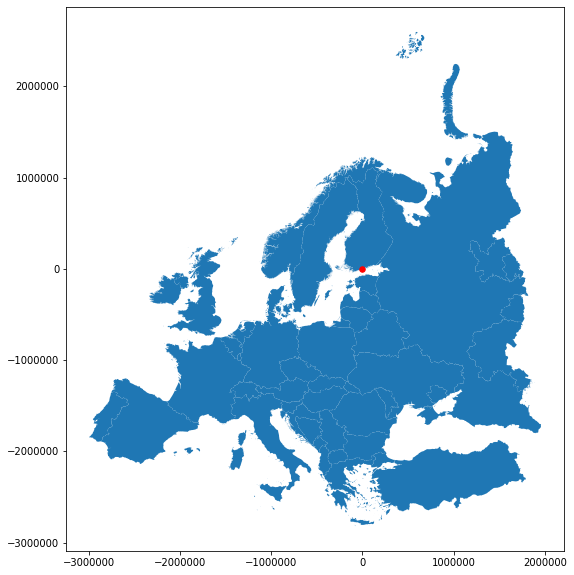

In [19]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))

# Plot the country borders
europe_borders_aeqd.plot(ax=ax)

# Plot the Helsinki point on top of the borders using the same axis
helsinki.plot(ax=ax, color='red', markersize=30)

Como podemos ver no mapa, a projeção é de fato centralizada em Helsinque, pois a posição 0 dos eixos x e y estão localizadas onde Helsinque está posicionada. Agora os valores das coordenadas mostram a distância de Helsinque (ponto vermelho) para diferentes direções (Sul, Norte, Leste e Oeste) em metros.

Em seguida, nosso objetivo é calcular a distância de todos os países até a cidade de Helsinque. Para podermos fazer isso, precisamos calcular os centróides de todos os polígonos que representam os limites dos países europeus.

- Isso pode ser feito facilmente em Geopandas usando o atributo `centroid`:

In [20]:
europe_borders_aeqd['centroid'] = europe_borders_aeqd.centroid
print(europe_borders_aeqd.head(2))

            TZID                                           geometry  \
0  Europe/Berlin  POLYGON ((-1057542.597130521 -493724.801682817...   
1  Europe/Berlin  POLYGON ((-1216418.435359255 -1243831.63520633...   

                                        centroid  
0  POINT (-1057718.135423443 -492420.5658204998)  
1  POINT (-1218235.216971496 -1242668.589667922)  


Agora nós criamos uma nova coluna chamada `centroid` que possui as geometrias de Ponto representando os centróides de cada polígono (na projeção Equidistante Azimutal).

Em seguida, calcularemos as distâncias entre os centróides dos países até Helsinque. Para fazer isso, poderíamos usar a função `iterrows ()` que usamos anteriormente, mas aqui demonstraremos uma técnica mais eficiente (mais rápida) para percorrer todas as linhas no (Geo) DataFrame usando a função `apply ()`.

A função [apply ()] (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) pode dar um grande impulso no desempenho sobre o `iterrows ()` e é a maneira recomendável de iterar as linhas em (Geo) DataFrames. Aqui, veremos como usá-la para calcular a distância entre os centróides até Helsinque.

  - Primeiro, criaremos uma função dedicada para calcular as distâncias chamadas de `calculate_distance()`:

In [21]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

Aqui, o parâmetro `row` é usado para passar os dados de cada linha do nosso GeoDataFrame para a função. Outros paramaters são usados para passar outras informações necessárias para usar a nossa função.

- Antes de usar nossa função e calcular as distâncias entre Helsinki e os centróides, precisamos obter a geometria do ponto Shapely do ponto central de Helsinque reprojetado, para que passamos passar para a nossa função (no parâmetro `dest_geom`. Podemos usar a função `loc` para recuperar o valores especificos de índice e coluna:

In [22]:
# Retrieve the geometry from Helsinki GeoDataFrame
helsinki_geom = helsinki.loc[0, 'geometry']
print(helsinki_geom)

POINT (0 0)


Agora estamos prontos para usar nossa função `apply ()`. Ao usar a função, é importante especificar a direção da iteração que deve estar no nosso caso especificada com `axis = 1`. Isso garante que os cálculos sejam feitos linha por linha (em vez de coluna a coluna).
  
- Quando iterar sobre um DataFrame ou GeoDataFrame, a função apply é usada seguindo o formato `GeoDataFrame.apply (name_of_your_function, param1, param2, param3, axis = 1)`
  
     - Observe que o primeiro parâmetro é sempre o nome da função que você deseja usar ** SEM ** os parênteses. Isto irá iniciar a iteração usando a função que você criou, e os valores da linha serão inseridos nos parâmetros / atributos ao `row` dentro da função (veja acima).

In [23]:
# Calculate the distances using our custom function called 'calculate_distance'
europe_borders_aeqd = europe_borders_aeqd.apply(calculate_distance, dest_geom=helsinki_geom, src_col='centroid', target_col='dist_to_Hki', axis=1)
print(europe_borders_aeqd.head(10))

            TZID                                           geometry  \
0  Europe/Berlin  POLYGON ((-1057542.597130521 -493724.801682817...   
1  Europe/Berlin  POLYGON ((-1216418.435359255 -1243831.63520633...   
2  Europe/Berlin  POLYGON ((-1194521.638643211 -571726.459328880...   
3  Europe/Berlin  POLYGON ((-1185933.276237431 -571780.052772927...   
4  Europe/Berlin  POLYGON ((-1182416.219837206 -569097.571220090...   
5  Europe/Berlin  POLYGON ((-1172799.400650827 -565749.438722841...   
6  Europe/Berlin  POLYGON ((-1162805.427517967 -563558.434197177...   
7  Europe/Berlin  POLYGON ((-1129053.540904054 -568388.469960322...   
8  Europe/Berlin  POLYGON ((-1109126.532709598 -570899.989413469...   
9  Europe/Berlin  POLYGON ((-703490.1465879157 -664009.791857452...   

                                        centroid  dist_to_Hki  
0  POINT (-1057718.135423443 -492420.5658204998)  1166.724332  
1  POINT (-1218235.216971496 -1242668.589667922)  1740.207536  
2  POINT (-1194210.7892994

Ótimo! Agora calculamos com sucesso as distâncias entre os centróides de cada país em formato de Polygon para a cidade de Helsinki em formato de Point. 😎

- Vamos verificar qual é a distância mais longa e a distância média para Helsinque, em relação aos centróides de outros países europeus:

In [24]:
# Calculat the maximum and average distance
max_dist = europe_borders_aeqd['dist_to_Hki'].max()
mean_dist = europe_borders_aeqd['dist_to_Hki'].mean()

print("Maximum distance to Helsinki is %.0f km, and the mean distance is %.0f km." % (max_dist, mean_dist))

Maximum distance to Helsinki is 3470 km, and the mean distance is 1177 km.


Como podemos ver, os finlandeses que vivem no norte estão razoavelmente distantes de todos os outros países europeus, já que a distância média para outros países é de 1185 quilômetros.

Aviso: Se você quiser calcular distâncias entre vários locais ao redor do mundo, é recomendável usar a [fórmula de Haversine] (https://en.wikipedia.org/wiki/Haversine_formula) para fazer os cálculos. o pacote [Haversine] (https://github.com/mapado/haversine) em Python fornece uma função fácil de usar para calcular com base em valores de latitude e longitude.

## Resumo 

Durante este tutorial, vimos como:

**1)** definir o sistema de referência de coordenadas com algumas abordagens diferentes, principalmente por:

 - especificando o sistema de referência de coordenadas com o dicionário crs, e. `{'init': 'epsg: 4326'}`
 - especificando CRS com Proj4-string usando a biblioteca PyCRS: `pycrs.parser.from_epsg_code (4326) .to_proj4 ()`
 - especificando CRS um pouco mais incomum (equidistante azimutal) com string Proj4 usando a biblioteca pyproj: `pyproj.Proj (proj = 'aeqd', ellps = 'WGS84', datum = 'WGS84', lat_0 = hki_lat, lon_0 = hki_lon). srs`

**2)** reprojetar (transformar) as geometrias de crs para outra usando a função `to_crs ()` em GeoPandas

**3)** calcule as distâncias entre os locais e usar a função `apply()` para iterar as linhas de maneira mais eficiente do que usando o `iterrows()`.